In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv ("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
#afficher les statistiques du jeu de donnée
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


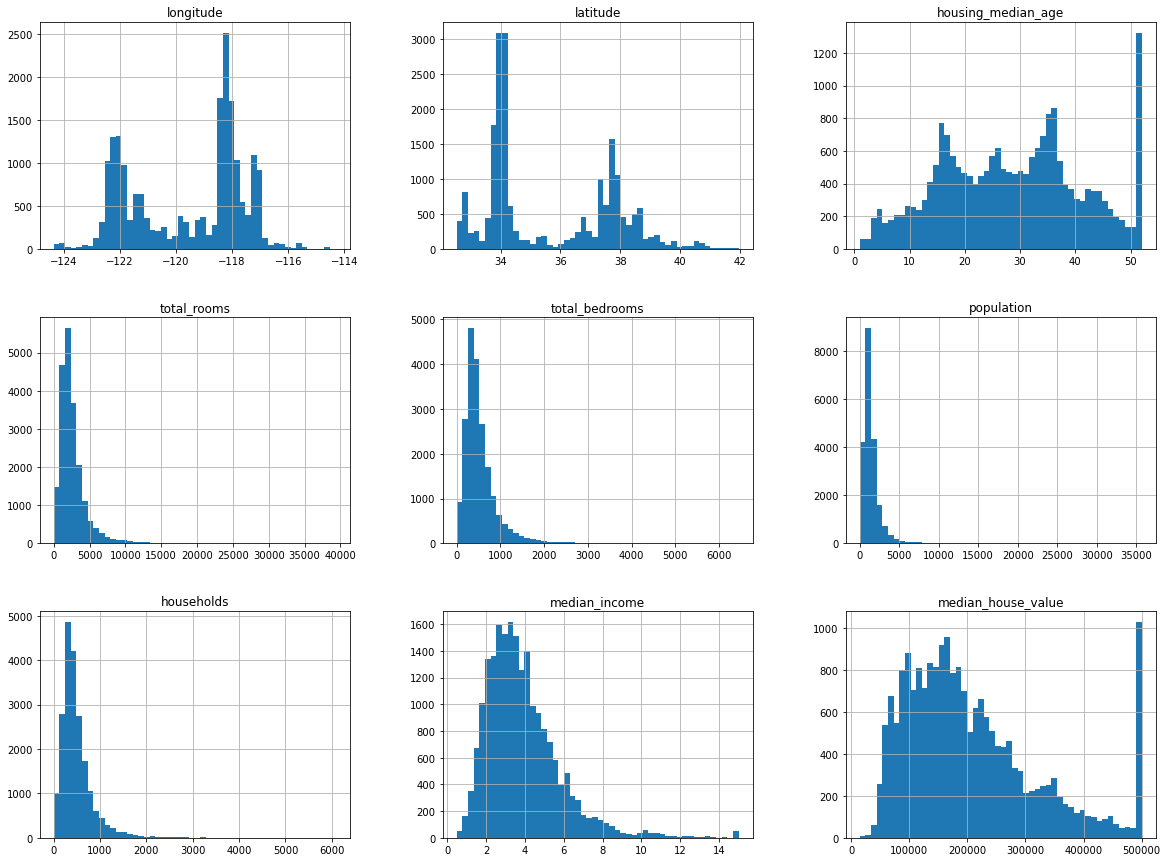

In [7]:
#Créez un code qui affiche les histogrammes des différents attributs. Le nombre de "bins" àsaisir est 50 et la taille de chaque histogramme "figsize=(20,15)".
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
#df["income_cat"] = np.ceil(df["median_income"]/ 1.5)
#df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

In [9]:
y = df["median_house_value"].values.reshape(-1, 1)
x = df.drop("median_house_value",axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=8)


In [10]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15722,-122.46,37.78,47.0,1682.0,379.0,837.0,375.0,5.2806,NEAR BAY
19685,-121.61,39.14,44.0,2035.0,476.0,1030.0,453.0,1.4661,INLAND
6989,-118.04,33.97,29.0,2376.0,700.0,1968.0,680.0,2.6082,<1H OCEAN
5804,-118.25,34.15,13.0,1107.0,479.0,616.0,443.0,0.8185,<1H OCEAN
5806,-118.26,34.14,29.0,3431.0,1222.0,4094.0,1205.0,2.2614,<1H OCEAN


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

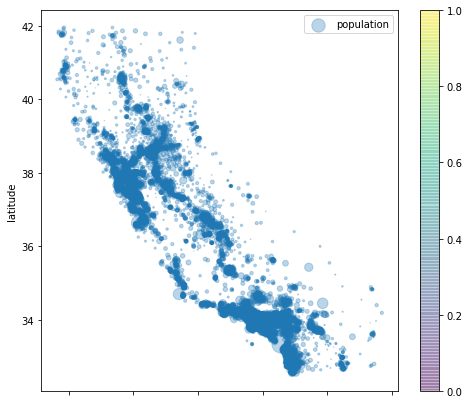

In [11]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
            s=df["population"]/100, label="population",
             cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(8,7))
plt.legend()
plt.colorbar


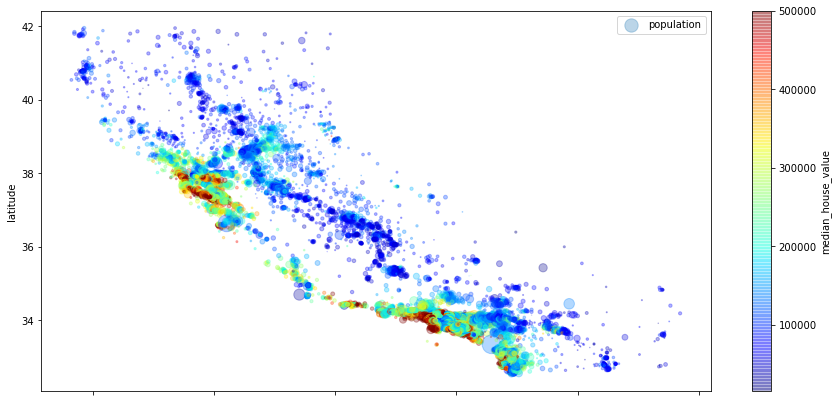

In [12]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
            s=df["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()

In [13]:
img = mpimg.imread('california.png')

<function matplotlib.pyplot.legend(*args, **kwargs)>

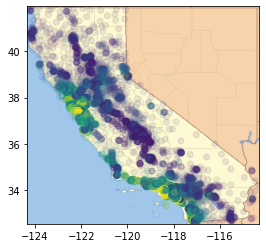

In [14]:
fig, ax = plt.subplots()
ax.imshow(img, extent=[-124.35, -114.31, 32.54, 41.95])
ax.scatter(df['longitude'],df['latitude'], c=df["median_house_value"], alpha=0.1)
plt.legend

In [15]:
df["median_house_value"].corr

<bound method Series.corr of 0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64>

# Nettoyage des données

In [16]:
#a = pd.read_csv("housing.csv")

In [17]:
Y = df['median_house_value'].copy()
X = df.drop("median_house_value", axis=1)


In [18]:
#Supprimer les valeurs manquantes (NaN)
X["total_bedrooms"].fillna(df["total_bedrooms"].mean(), inplace = True) 

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
labelencoder = LabelEncoder()
X["ocean_proximity"] = labelencoder.fit_transform(X["ocean_proximity"])
print(X["ocean_proximity"])

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int32


# 2

In [22]:
#Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage.
from sklearn.linear_model import LinearRegression
y = Y.values.reshape(-1, 1)
x = X.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [23]:
#Créez un code qui prédit les classes de la base d’apprentissage.
y_pred_train = regressor.predict(x_train)
print(y_pred_train)
print("======")
print(y_test)

[[ 97592.45723536]
 [158423.95414485]
 [117111.86261402]
 ...
 [207508.14218356]
 [288402.3511676 ]
 [288627.68460499]]
[[226500.]
 [196200.]
 [145800.]
 ...
 [181500.]
 [183200.]
 [ 82200.]]


In [24]:
#3. Calculez la mesure RMSE du modèle de la régression linéaire.
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(rmse,y_train.shape,y_pred_train.shape)

69514.52386027855 (16512, 1) (16512, 1)


5. Même si la valeur de RMSE de DecisionTreeRegressor est égale à 0, on ne peut pas conclure
que ce modèle fonctionne parfaitement sur la base d’apprentissage. Pour s’assurer, on va
répartir la base d’apprentissage en base d’apprentissage et en base de test en utilisant la
méthode 10-fold cross-validation. Pour ce faire, utilisez la fonction cross_val_score du sousmodule
model_selection du module sklearn. Ensuite, affichez :

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
scores = cross_val_score(regressor, x_train, y_train,cv=10)
for i in scores:
    print(i.mean()**2)
print("-----")
print(scores.mean())
print(scores.std())

0.37672720717411046
0.388188595418932
0.36953521000522416
0.3802905969803094
0.41530038816650827
0.4012276485156973
0.39337116897485935
0.449483638433235
0.3876546940474999
0.4339994965200623
-----
0.6318297510162819
0.01921015758256518


In [27]:
#Refaites les deux étapes précédentes avec le modèle DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target, test_size=0.80, random_state=40)
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X_train, y_train)
y_predicted_train = clf.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print(rmse,y_train.shape,y_predicted_train.shape)

32.746580954560194 (88,) (88,)


## 3 Fine-Tunning

### 3.1 Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [29]:
rforest = RandomForestRegressor(random_state=42, n_estimators=100)
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
#grid_search = GridSearchCV(rforest, param_grid, cv=5,scoring='neg_mean_squared_error')
model = GridSearchCV(estimator=rforest, param_grid=param_grid, n_jobs=1, cv=5)
model.fit(X_train,y_train)
print(model.best_score_)
print(model.best_params_)

0.4735405569948348
{'max_features': 4, 'n_estimators': 30}


In [30]:
best = model.best_estimator_
best

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

### 3.2 Evaluation sur la base de test

1. Remplacer les valeurs NaN de l’attribut "total_bedrooms" de la base de test par la médiane

In [32]:
X["total_bedrooms"].fillna(X["total_bedrooms"].median(), inplace=True)
X["total_bedrooms"].isnull().sum()

0

2. Transformer les valeurs textuelles de "ocean_proximity" en valeurs numériques

In [33]:
X["ocean_proximity"]

0        3
1        3
2        3
3        3
4        3
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: ocean_proximity, Length: 20640, dtype: int32

3. Stocker le modèle d’apprentissage dans une variable en utilisant la fonction best_estimator_
du module GridSearchCV

In [36]:
variable = best.fit(X_test,y_test)
y_pred = variable.predict(X_test)
y_pred 

array([ 88.56666667, 109.73333333, 138.56666667, 286.7       ,
       227.13333333, 275.13333333, 169.06666667, 126.8       ,
       123.43333333, 100.53333333, 212.9       ,  77.46666667,
        87.46666667, 150.16666667, 129.56666667, 169.73333333,
       109.23333333, 114.33333333, 120.4       , 243.1       ,
        61.76666667, 248.36666667, 191.93333333,  65.56666667,
        87.76666667, 112.3       , 120.63333333, 146.33333333,
       247.3       ,  90.53333333, 188.03333333, 131.73333333,
       121.3       , 173.56666667, 100.6       ,  65.06666667,
       119.26666667,  76.2       , 216.43333333, 109.16666667,
       209.86666667, 158.5       , 179.8       , 135.5       ,
       190.3       , 115.1       ,  65.4       , 158.66666667,
       112.43333333, 226.8       , 279.4       , 183.16666667,
       270.36666667, 183.43333333, 192.6       , 219.23333333,
       106.8       , 138.96666667, 174.1       , 163.8       ,
        95.4       ,  72.5       , 203.5       , 171.  

In [37]:
mean_squared_error(y_pred,y_test)

554.9404017576899